In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor as LOF
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score, PrecisionRecallDisplay

In [2]:
data=pd.read_csv('.\data\creditcard.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nahal\AppData\Local\Temp\ipykernel_17532\4229568528.py:1: SyntaxWarning: invalid escape sequence '\d'
  data=pd.read_csv('.\data\creditcard.csv')


In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
n_duplicates = data.duplicated().sum()
print(f'Number of duplicate rows: {n_duplicates}')

Number of duplicate rows: 1081


In [8]:
data = data.drop_duplicates()
print(f'Number of rows after removing duplicates: {data.shape[0]}')

Number of rows after removing duplicates: 283726


In [9]:

data.shape


(283726, 31)

In [10]:
data.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
data.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
print("\nClass distribution:")
class_counts = data['Class'].value_counts()
print(class_counts)
print("Percentage:\n", class_counts / len(data) * 100)


Class distribution:
Class
0    283253
1       473
Name: count, dtype: int64
Percentage:
 Class
0    99.83329
1     0.16671
Name: count, dtype: float64


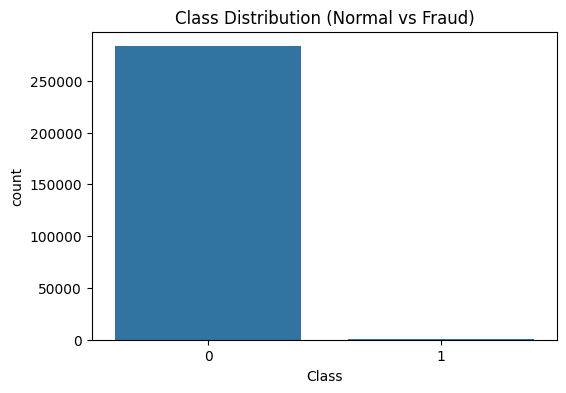

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (Normal vs Fraud)')
plt.show()

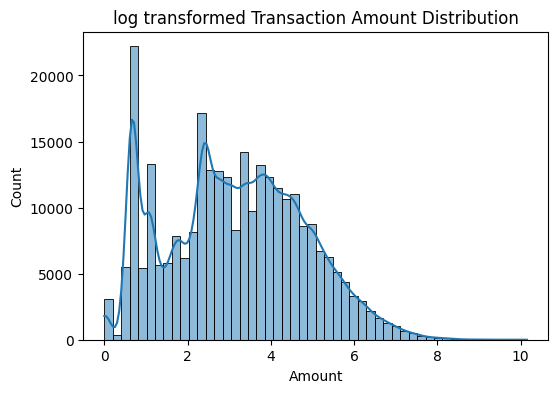

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(data['Amount']),bins=50,kde=True)
plt.title('log transformed Transaction Amount Distribution')
plt.show()

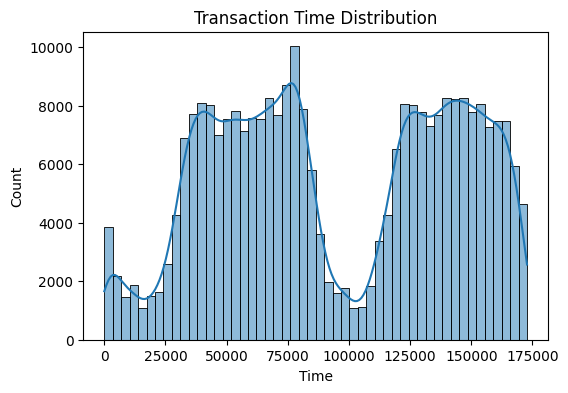

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Transaction Time Distribution')
plt.show()

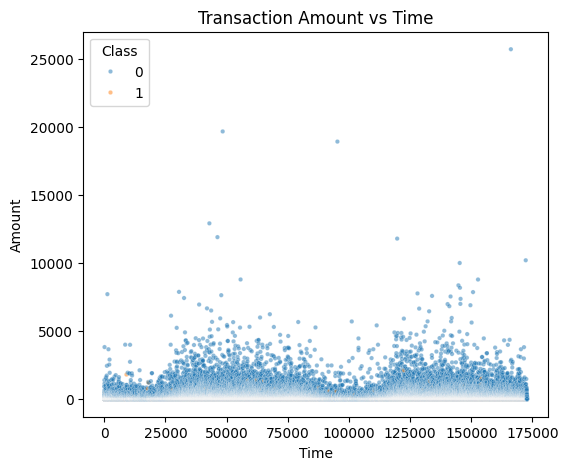

In [16]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=data, alpha=0.5,s=10)
plt.title('Transaction Amount vs Time')
plt.show()

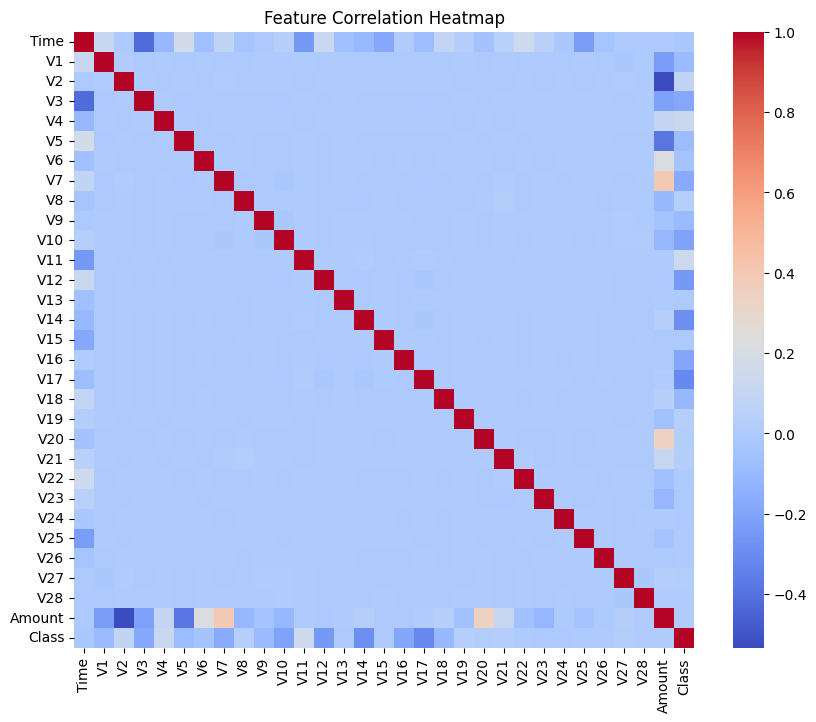

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [18]:
features = data.drop("Class", axis=1)
labels = data["Class"]


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(features)


print("Scaled feature shape:", X_scaled.shape)

Scaled feature shape: (283726, 30)


Explained variance ratio: [0.61170671 0.053396  ]


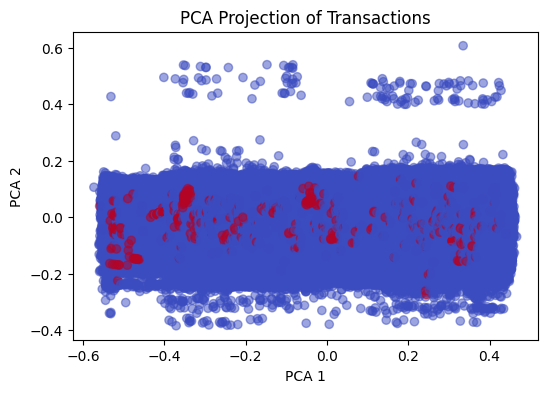

In [ ]:
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(X_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_)


plt.figure(figsize=(6,4))
plt.scatter(pca_result[:,0], pca_result[:,1], c=labels, cmap="coolwarm", alpha=0.5)
plt.title("PCA Projection of Transactions")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [20]:
fraud_count = labels.sum()
total_count = len(labels)
contamination = fraud_count / total_count
print(f"Contamination (fraud ratio): {contamination:.6f}")

Contamination (fraud ratio): 0.001667


In [21]:

y_true=labels

In [22]:
isolation_forest = IsolationForest(n_estimators=100, contamination=contamination, random_state=42)
isolation_forest.fit(X_scaled)

,n_estimators,100
,max_samples,'auto'
,contamination,np.float64(0....7101358352777)
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [23]:
y_pred_iso = np.where(isolation_forest.predict(X_scaled) == 1, 0, 1)
y_scores_iso = -isolation_forest.decision_function(X_scaled)

In [24]:
print("\nIsolation Forest Results:")
print(confusion_matrix(y_true, y_pred_iso))
print(classification_report(y_true, y_pred_iso, digits=4))
print("ROC AUC:", roc_auc_score(y_true, y_scores_iso))
print("Average Precision:", average_precision_score(y_true, y_scores_iso))


Isolation Forest Results:
[[282857    396]
 [   396     77]]
              precision    recall  f1-score   support

           0     0.9986    0.9986    0.9986    283253
           1     0.1628    0.1628    0.1628       473

    accuracy                         0.9972    283726
   macro avg     0.5807    0.5807    0.5807    283726
weighted avg     0.9972    0.9972    0.9972    283726

ROC AUC: 0.943365913718698
Average Precision: 0.09034616755649452


In [25]:
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=contamination)
svm.fit(X_scaled)
y_pred_svm = np.where(svm.predict(X_scaled) == 1, 0, 1)
y_scores_svm = -svm.decision_function(X_scaled)

In [26]:
print("\nOne-Class SVM Results:")
print(confusion_matrix(y_true, y_pred_svm))
print(classification_report(y_true, y_pred_svm, digits=4))
print("ROC AUC:", roc_auc_score(y_true, y_scores_svm))
print("Average Precision:", average_precision_score(y_true, y_scores_svm))



One-Class SVM Results:
[[282891    362]
 [   364    109]]
              precision    recall  f1-score   support

           0     0.9987    0.9987    0.9987    283253
           1     0.2314    0.2304    0.2309       473

    accuracy                         0.9974    283726
   macro avg     0.6151    0.6146    0.6148    283726
weighted avg     0.9974    0.9974    0.9974    283726

ROC AUC: 0.6063679659334428
Average Precision: 0.1367506947730638


In [27]:
lof=LOF(n_neighbors=20, contamination=contamination)
y_pred_lof = lof.fit_predict(X_scaled)
y_pred_lof = np.where(y_pred_lof == 1, 0, 1)
y_scores_lof = -lof.negative_outlier_factor_

In [28]:
print("\nLocal Outlier Factor (LOF) Results:")
print(confusion_matrix(y_true, y_pred_lof))
print(classification_report(y_true, y_pred_lof, digits=4))
print("ROC AUC:", roc_auc_score(y_true, y_scores_lof))
print("Average Precision:", average_precision_score(y_true, y_scores_lof))


Local Outlier Factor (LOF) Results:
[[282781    472]
 [   472      1]]
              precision    recall  f1-score   support

           0     0.9983    0.9983    0.9983    283253
           1     0.0021    0.0021    0.0021       473

    accuracy                         0.9967    283726
   macro avg     0.5002    0.5002    0.5002    283726
weighted avg     0.9967    0.9967    0.9967    283726

ROC AUC: 0.49766849079535186
Average Precision: 0.002284296195435722


<Figure size 700x500 with 0 Axes>

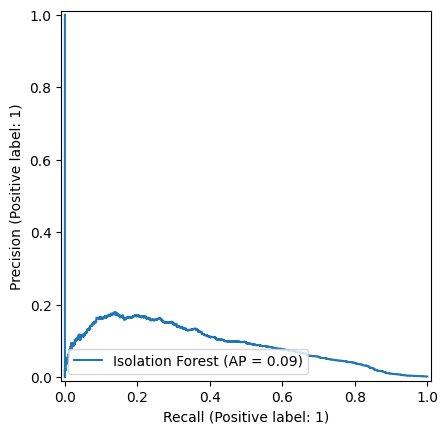

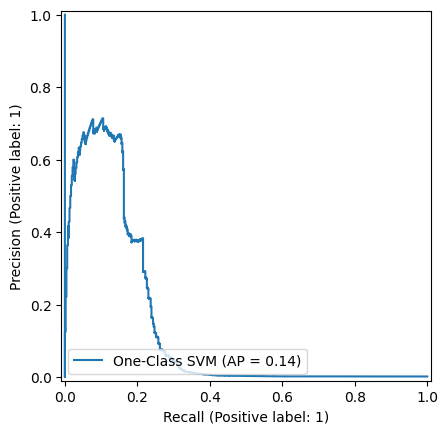

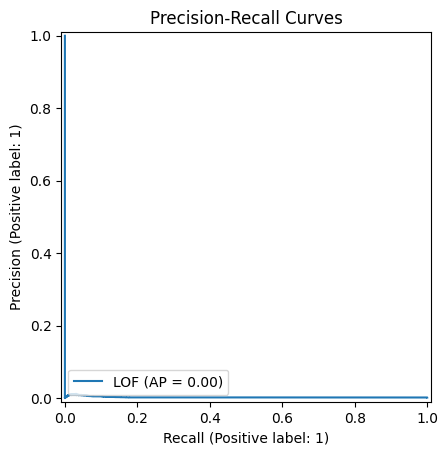

In [29]:

plt.figure(figsize=(7,5))
PrecisionRecallDisplay.from_predictions(y_true, y_scores_iso, name="Isolation Forest")
PrecisionRecallDisplay.from_predictions(y_true, y_scores_svm, name="One-Class SVM")
PrecisionRecallDisplay.from_predictions(y_true, y_scores_lof, name="LOF")
plt.title("Precision-Recall Curves")
plt.show()

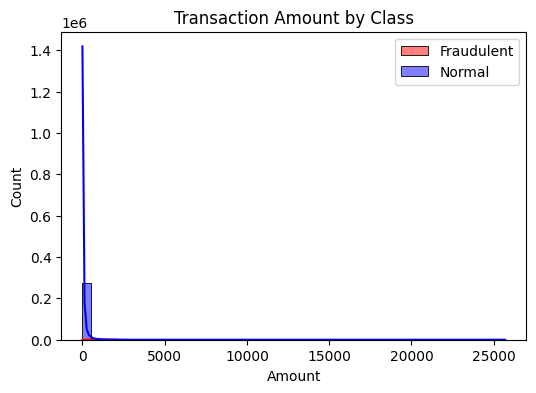

In [30]:

plt.figure(figsize=(6,4))
sns.histplot(data[data['Class']==1]['Amount'], bins=50, kde=True, color="red", label="Fraudulent")
sns.histplot(data[data['Class']==0]['Amount'], bins=50, kde=True, color="blue", alpha=0.5, label="Normal")
plt.title("Transaction Amount by Class")
plt.legend()
plt.show()



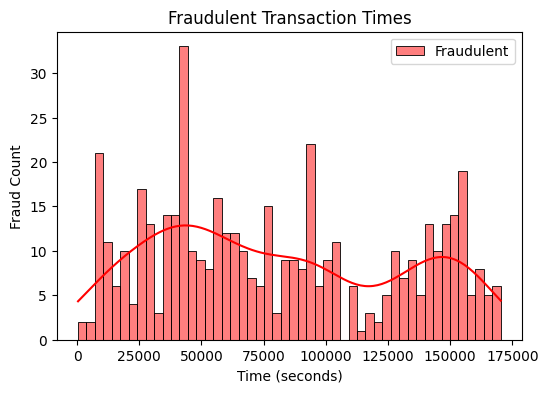

In [31]:
plt.figure(figsize=(6,4))
sns.histplot(data[data['Class']==1]['Time'], bins=50, kde=True, color="red", label="Fraudulent")
plt.title("Fraudulent Transaction Times")
plt.legend()
plt.xlabel("Time (seconds)")  
plt.ylabel("Fraud Count")
plt.show()

In [32]:
print("Final Insights")
print("1. Among the unsupervised models tested, Isolation Forest performs the best overall for this dataset.")
print("2. ROC AUC for Isolation Forest is high (~0.94), indicating strong ability to rank anomalies correctly.")
print("3. One-Class SVM detects slightly more frauds (higher recall) but is less reliable overall (lower ROC AUC).")
print("4. LOF is not suitable here; it detects almost no fraud and behaves randomly.")
print("5. Fraudulent transactions are extremely rare (<0.2%) and often have distinct amounts and time patterns.")
print("6. Unsupervised models can flag suspicious transactions without labels, but precision/recall for rare events remains a challenge.")


Final Insights
1. Among the unsupervised models tested, Isolation Forest performs the best overall for this dataset.
2. ROC AUC for Isolation Forest is high (~0.94), indicating strong ability to rank anomalies correctly.
3. One-Class SVM detects slightly more frauds (higher recall) but is less reliable overall (lower ROC AUC).
4. LOF is not suitable here; it detects almost no fraud and behaves randomly.
5. Fraudulent transactions are extremely rare (<0.2%) and often have distinct amounts and time patterns.
6. Unsupervised models can flag suspicious transactions without labels, but precision/recall for rare events remains a challenge.
